Exploration of word embeddings

In this notebook, examine trained word embeddings, and explore word similarities.

In [1]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [ ]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [ ]:
model.most_similar("cold", topn=20)

[('cool', 0.8103547692298889),
 ('hot', 0.8010528087615967),
 ('warm', 0.7918359637260437),
 ('dry', 0.784081757068634),
 ('chill', 0.7586870193481445),
 ('heat', 0.7549161314964294),
 ('turning', 0.7393249273300171),
 ('weather', 0.7335986495018005),
 ('intense', 0.7242282629013062),
 ('deep', 0.7234195470809937),
 ('temperatures', 0.7227210402488708),
 ('little', 0.7130317687988281),
 ('cooler', 0.7115269303321838),
 ('heavy', 0.7092522382736206),
 ('winter', 0.7077405452728271),
 ('snow', 0.7043208479881287),
 ('ground', 0.7036628127098083),
 ('too', 0.7010939717292786),
 ('dangerous', 0.7007119059562683),
 ('atmosphere', 0.7000380754470825)]

Find the cosine similarity between two words

In [ ]:
model.similarity("good", "bad")

0.79648936

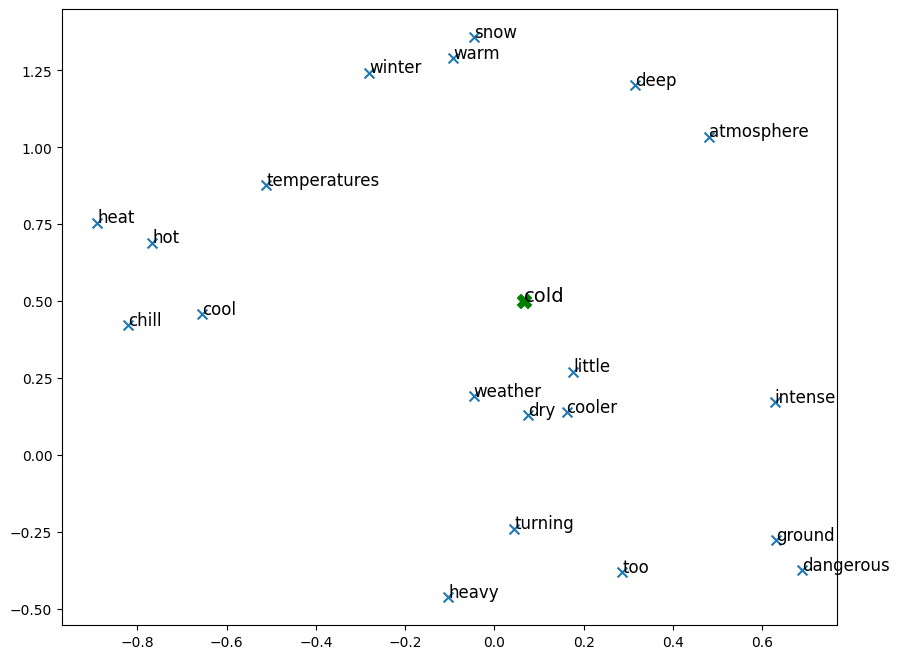

In [ ]:
import matplotlib.pyplot as plt

word = 'cold'
similar_words = model.similar_by_word(word, topn=20)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
x = [vector[0] for vector in similar_word_vectors]
y = [vector[1] for vector in similar_word_vectors]
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, marker='x', s=50) # set marker as 'x' and increase size to 100

# add labels for the similar words
for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax.annotate(word, (x[i], y[i]), size=12) # increase size of the word labels to 12

# add the original word at origin
word = 'cold'
ax.scatter(model[word][0],model[word][1], marker='X', s=100, color='green')
ax.annotate(word,(model[word][0],model[word][1]), size=14)

# show the plot
plt.show()

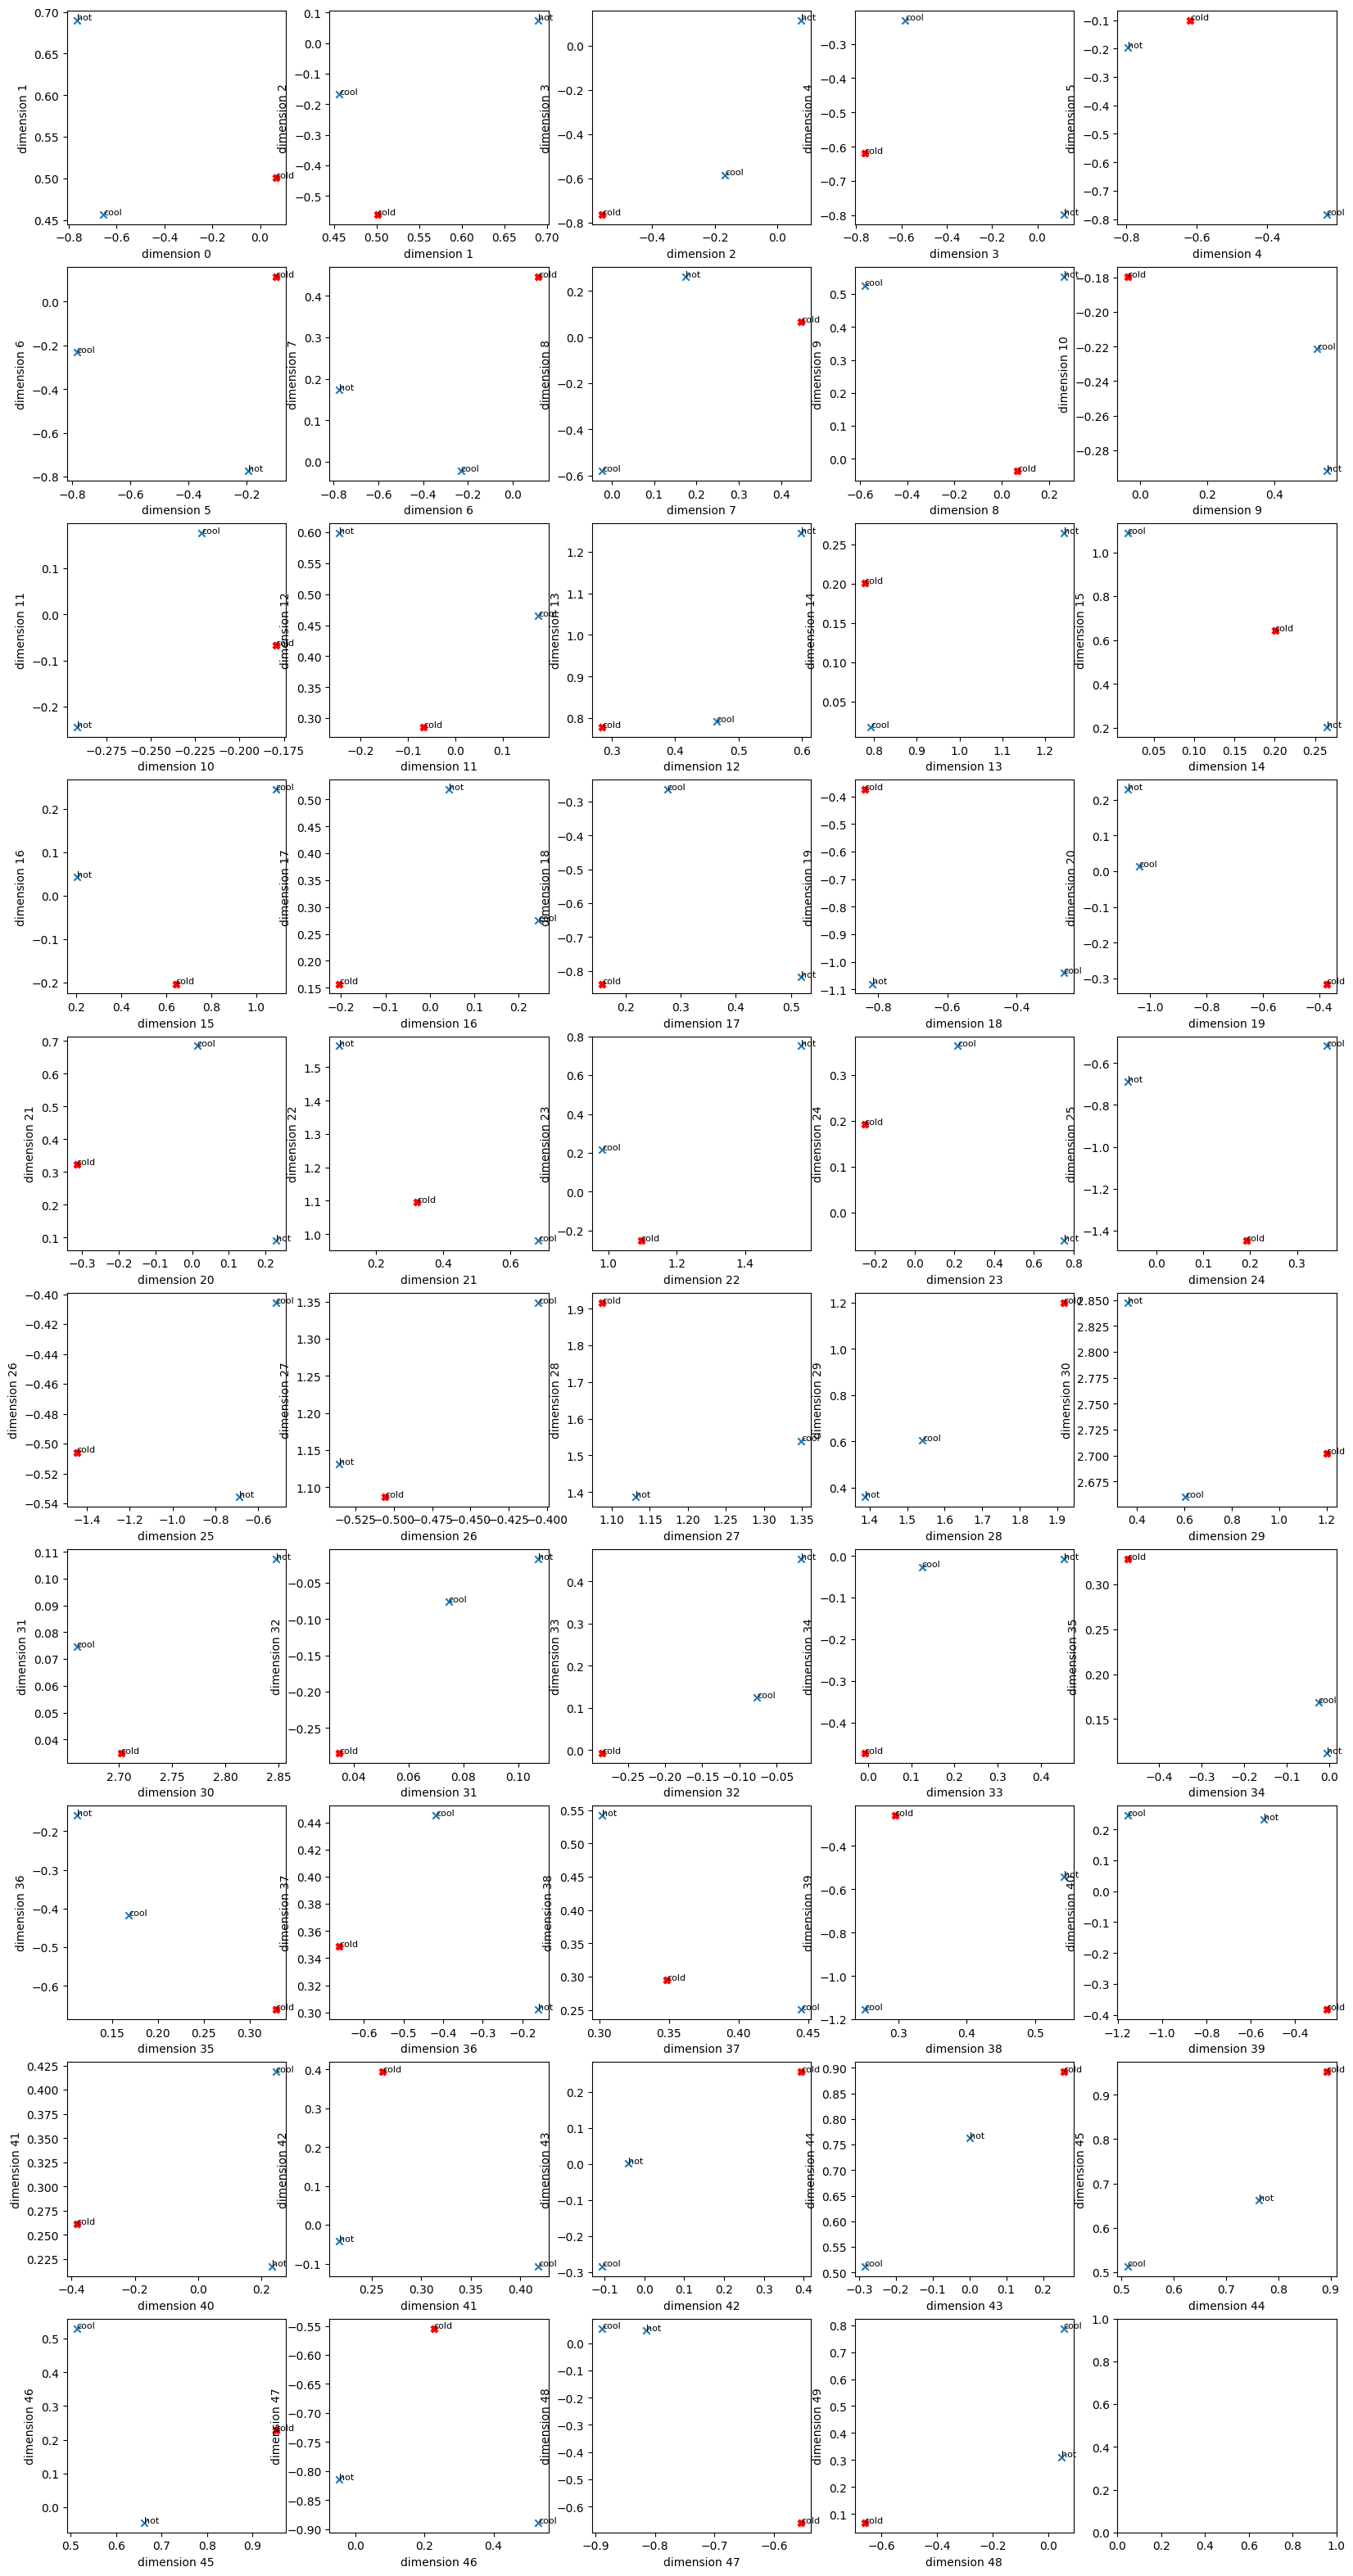

In [ ]:
word = 'cold'
similar_words = model.similar_by_word(word, topn=2)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
fig, ax = plt.subplots(10,5, squeeze=True, figsize=(20,40))

for dim1, dim2 in zip(range(49),range(1,50)):
  x = [vector[dim1] for vector in similar_word_vectors]
  y = [vector[dim2] for vector in similar_word_vectors]
  ax[dim1//5, dim1%5].scatter(x, y, marker='x') # set marker as 'x' and reduce size to deailt value
  for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax[dim1//5, dim1%5].annotate(word, (x[i], y[i]), size=8) # reduce size of the word labels to 8
  word = 'cold'
  ax[dim1//5, dim1%5].scatter(model[word][dim1],model[word][dim2], marker='X', color='red')
  ax[dim1//5, dim1%5].annotate(word,(model[word][dim1],model[word][dim2]), size=8)
  ax[dim1//5, dim1%5].set_xlabel("dimension {}".format(dim1))
  ax[dim1//5, dim1%5].set_ylabel("dimension {}".format(dim2))
# show the plot
plt.show()

In [ ]:
def similarity_vec(v1,v2):
  return np.dot(v1,v2)/np.sqrt(np.dot(v1,v1))/np.sqrt(np.dot(v2,v2))

In [ ]:
word = 'cold'
similar_words = model.similar_by_word(word, topn=10)
A= [word[0] for word in similar_words]

In [ ]:
sim_matrix = np.zeros((len(A),len(A)))
for i in range(len(A)):
  for j in range(i,len(A)):
    sim_matrix[i,j]= "{:.2f}".format(model.similarity(A[i],A[j]))

sim_matrix


array([[1.  , 0.86, 0.81, 0.77, 0.73, 0.7 , 0.68, 0.68, 0.56, 0.57],
       [0.  , 1.  , 0.75, 0.76, 0.73, 0.74, 0.67, 0.68, 0.52, 0.58],
       [0.  , 0.  , 1.  , 0.76, 0.73, 0.68, 0.57, 0.68, 0.62, 0.64],
       [0.  , 0.  , 0.  , 1.  , 0.65, 0.66, 0.56, 0.68, 0.47, 0.62],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.73, 0.5 , 0.64, 0.53, 0.54],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.57, 0.63, 0.57, 0.58],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.51, 0.68, 0.74],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.58, 0.5 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.68],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [ ]:
A

['cool',
 'hot',
 'warm',
 'dry',
 'chill',
 'heat',
 'turning',
 'weather',
 'intense',
 'deep']

In [ ]:
vectors = np.zeros((11,50))
vectors[0] = model['cold']
for i, word in zip(range(1,11),A):
  vectors[i] = model[word]

In [ ]:
vectors_tr = vectors - vectors.mean(axis=0)

In [ ]:
sim_matrix_2 = np.zeros((11,11))
for i in range(11):
  for j in range(i,11):
    sim_matrix_2[i,j]= "{:.2f}".format(similarity_vec(vectors_tr[i],vectors_tr[j]))

sim_matrix_2

array([[ 1.  , -0.12, -0.11, -0.12,  0.01, -0.11, -0.09, -0.08, -0.06,
         0.03, -0.04],
       [ 0.  ,  1.  ,  0.37,  0.14,  0.07,  0.01, -0.16, -0.05, -0.13,
        -0.35, -0.42],
       [ 0.  ,  0.  ,  1.  , -0.1 ,  0.06, -0.  ,  0.04, -0.07, -0.1 ,
        -0.44, -0.35],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.11, -0.03, -0.15, -0.41, -0.08,
        -0.15, -0.14],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.2 , -0.13, -0.34,  0.02,
        -0.48, -0.11],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.1 , -0.19, -0.08,
        -0.17, -0.23],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.24, -0.1 ,
        -0.16, -0.2 ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.3 ,
         0.31,  0.35],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        -0.07, -0.33],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.

In [ ]:
model.most_similar("marriage", topn=20)

[('divorce', 0.913163423538208),
 ('marriages', 0.841363787651062),
 ('marrying', 0.7991200685501099),
 ('marry', 0.7736250162124634),
 ('birth', 0.7494058012962341),
 ('inheritance', 0.7277015447616577),
 ('child', 0.717265784740448),
 ('divorced', 0.7135628461837769),
 ('adoption', 0.7118921279907227),
 ('sex', 0.710307240486145),
 ('mother', 0.7078800797462463),
 ('life', 0.7075121402740479),
 ('same-sex', 0.7074304819107056),
 ('daughter', 0.7044172286987305),
 ('relationship', 0.7009875178337097),
 ('parents', 0.6982859373092651),
 ('wife', 0.6972702741622925),
 ('spouse', 0.6968500018119812),
 ('family', 0.694057822227478),
 ('husband', 0.6933868527412415)]

In [ ]:
model.most_similar("divorce", topn=10)

[('marriage', 0.913163423538208),
 ('marriages', 0.8091549873352051),
 ('remarriage', 0.744776725769043),
 ('marital', 0.7349197864532471),
 ('divorced', 0.730230450630188),
 ('divorcing', 0.7257602214813232),
 ('marrying', 0.7249503135681152),
 ('sex', 0.6975968480110168),
 ('marry', 0.6968885660171509),
 ('divorces', 0.6876401305198669)]

In [ ]:
A=model["marriage"]

In [ ]:
B=model["divorce"]

In [ ]:
similarity_vec(A,B)

0.91316336

In [ ]:
np.sqrt(np.dot(A,A))

5.416816

In [ ]:
np.sqrt(np.dot(B,B))

5.2141666

In [ ]:
np.dot(A,B)/np.sqrt(np.dot(A,A))/np.sqrt(np.dot(B,B))

0.91316336

In [ ]:
np.sqrt(np.dot(B-A,B-A))

2.224033

In [ ]:
B-A

array([-0.11684999, -0.53783   ,  0.14179993,  0.24313   , -0.82369006,
       -0.2651    ,  0.21365   ,  0.48775   , -0.07798001,  0.09117001,
       -0.14017   , -0.24163002, -0.243967  , -0.22272   ,  0.92236   ,
        0.18984999, -0.02298999, -0.09099996, -0.04949999, -0.1933    ,
        0.26579002,  0.25298   ,  0.32797998,  0.03977999, -0.302279  ,
        0.38740003,  0.11045   ,  0.40832996, -0.02853   ,  0.12260002,
       -0.5113001 , -0.465715  ,  0.25090998,  0.13326   , -0.117546  ,
        0.02478004, -0.004542  , -0.185328  ,  0.49594   , -0.40836   ,
       -0.05751997,  0.157253  ,  0.276855  ,  0.25164998, -0.11543995,
       -0.51421   ,  0.18953   ,  0.38090003, -0.25795   ,  0.03266001],
      dtype=float32)

In [ ]:
model.most_similar("cold", topn=20)

[('cool', 0.8103547692298889),
 ('hot', 0.8010528087615967),
 ('warm', 0.7918359637260437),
 ('dry', 0.784081757068634),
 ('chill', 0.7586870193481445),
 ('heat', 0.7549161314964294),
 ('turning', 0.7393249273300171),
 ('weather', 0.7335986495018005),
 ('intense', 0.7242282629013062),
 ('deep', 0.7234195470809937),
 ('temperatures', 0.7227210402488708),
 ('little', 0.7130317687988281),
 ('cooler', 0.7115269303321838),
 ('heavy', 0.7092522382736206),
 ('winter', 0.7077405452728271),
 ('snow', 0.7043208479881287),
 ('ground', 0.7036628127098083),
 ('too', 0.7010939717292786),
 ('dangerous', 0.7007119059562683),
 ('atmosphere', 0.7000380754470825)]

In [ ]:
model.similar_by_vector(model['cold'],topn=10)

[('cold', 1.0),
 ('cool', 0.8103547692298889),
 ('hot', 0.8010528087615967),
 ('warm', 0.7918359637260437),
 ('dry', 0.784081757068634),
 ('chill', 0.7586870193481445),
 ('heat', 0.7549161314964294),
 ('turning', 0.7393249869346619),
 ('weather', 0.7335987091064453),
 ('intense', 0.7242282629013062)]

In [ ]:
model.similar_by_vector(-model['cold'],topn=10)

[('puth', 0.710257351398468),
 ('pignatelli', 0.680493175983429),
 ('behera', 0.6738916039466858),
 ('dasilva', 0.670206606388092),
 ('parshvanath', 0.66840660572052),
 ('barlowe', 0.6613921523094177),
 ('ramez', 0.6601719260215759),
 ('sigfrid', 0.6576547026634216),
 ('nishan', 0.6559697985649109),
 ('kotowski', 0.6539767980575562)]

In [ ]:
v1 = model['king']-model['man']
v2 = model['queen']-model['woman']

In [ ]:
similarity_vec(v1,v2)

0.83967704

In [ ]:
np.sqrt(np.dot(v1-v2,v1-v2))

2.8391206

In [ ]:
A

['hot', 'cold', 'true', 'false']

In [ ]:
vectors.mean(axis=0)

array([-0.2210027 ,  0.50669   , -0.25227346, -0.1679785 , -0.4966223 ,
       -0.23009169, -0.1749446 ,  0.4753767 ,  0.13772492,  0.10995961,
       -0.14168513, -0.178418  ,  0.482555  ,  0.508929  , -0.00887052,
        0.4748305 ,  0.0053349 , -0.0114244 , -0.679455  , -0.91220202,
       -0.0673334 ,  0.4009783 ,  0.90627599, -0.180419  ,  0.36841291,
       -0.6483135 , -0.1022276 ,  1.034391  ,  1.36635899,  0.7155919 ,
        2.74163002,  0.2778845 , -0.0079641 , -0.1429861 , -0.21121684,
        0.2301909 , -0.4916197 ,  0.2915972 ,  0.37779631, -0.4345463 ,
       -0.027525  ,  0.2732963 ,  0.0117754 ,  0.04734656,  0.3323379 ,
        0.54046421,  0.3599866 , -0.39443429, -0.2680898 ,  0.0915337 ])

In [ ]:
model.similarity('true','false')

0.55475515

In [ ]:
A=['true','accurate','correct','legitimate', 'false', 'inaccurate', 'incorrect', 'illegitimate']
sim_matrix = np.zeros((len(A),len(A)))
for i in range(len(A)):
  for j in range(i,len(A)):
    sim_matrix[i,j]= "{:.2f}".format(model.similarity(A[i],A[j]))

sim_matrix

array([[1.  , 0.53, 0.61, 0.64, 0.55, 0.32, 0.44, 0.38],
       [0.  , 1.  , 0.77, 0.47, 0.51, 0.74, 0.78, 0.14],
       [0.  , 0.  , 1.  , 0.51, 0.6 , 0.62, 0.8 , 0.33],
       [0.  , 0.  , 0.  , 1.  , 0.56, 0.35, 0.44, 0.56],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.67, 0.67, 0.44],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.89, 0.24],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.32],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [ ]:
model.most_similar('true', topn=10)

[('indeed', 0.8788037300109863),
 ('fact', 0.8603488802909851),
 ('kind', 0.8594153523445129),
 ('sense', 0.8554990887641907),
 ('always', 0.8528818488121033),
 ('seems', 0.8484390377998352),
 ('something', 0.8472516536712646),
 ('thought', 0.8449729084968567),
 ('sort', 0.8414136171340942),
 ('perhaps', 0.839972734451294)]

In [ ]:
model.similar_by_vector(-model['true'])

[('k586-1', 0.7928743362426758),
 ('23aou94', 0.7814171314239502),
 ('25aou94', 0.7526133060455322),
 ('cw96', 0.7485079765319824),
 ('atentamente', 0.7404530048370361),
 ('beridze', 0.7187542915344238),
 ('kinigi', 0.7158722281455994),
 ('133.68', 0.7152117490768433),
 ('ryryryryryry', 0.714137077331543),
 ('ooooooooooooooooooooooooooooooooooooooo', 0.7102621793746948)]

In [ ]:
model.similarity('true','k586-1')

-0.79287434